**Entrainement CNN**

**Create model**

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# from pipeline.ml_model import load_data
import cv2


In [2]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu",input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation="softmax")
])

c:\Users\hp\Documents\projects\simplon_projects\Detection_demotions_faciales\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,166,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,135 (8.27 MB)

 Trainable params: 2,168,135 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

**Optimiser**

In [4]:
model.compile(
    optimizer="adam",
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics= ["accuracy"]
)

**Early stopping**

In [6]:
train_data , test_data= load_data()
early_stop= EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode=min,
    restore_best_weights=True

)
history= model.fit(
    train_data,
    epochs=10,
    validation_data= test_data,
    callbacks=[early_stop]
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.2514 - loss: 1.8118 - val_accuracy: 0.2473 - val_loss: 1.8140
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.2515 - loss: 1.8103 - val_accuracy: 0.2473 - val_loss: 1.8132
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.2515 - loss: 1.8099 - val_accuracy: 0.2473 - val_loss: 1.8131
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.2516 - loss: 1.8105 - val_accuracy: 0.2473 - val_loss: 1.8130
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.2515 - loss: 1.8097 - val_accuracy: 0.2473 - val_loss: 1.8130
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.2515 - loss: 1.8098 - val_accuracy: 0.2473 - val_loss: 1.8130
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 89s 98ms/step - accuracy: 0.2515 - loss: 1.8096 - val_accuracy: 0.2473 - val_loss: 1.8129
Epoch 8

**Charger le classifieur Haar Cascade**

In [13]:
def detect_face(img):
     # facecascade= cv2.CascadeClassifier('haarcascadefrontalface_default.xml')
     facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
     gracy_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     
     face= gracy_img.copy()
     #detectMultiScale :input=> is an img output=> is a rectangle
     face_rectangle= facecascade.detectMultiScale(face, scaleFactor=1.2, minNeighbors=5)
     #nbr of faces found
     print(len(face_rectangle))
     #(x, y) = (50, 100) → top-left corner of the rectangle
     #(x + w, y + h) = (50+80, 100+80) = (130, 180) → bottom-right corner
     #(255, 255, 255) → white color
     #10 → thickness of the rectangle
     for (x,y, w, h) in face_rectangle:
          cv2.rectangle(img, (x,y), (x + w, y + h), (0,128,0),10)
          image_extraction= gracy_img[y:y+h, x: x+w]
          plt.imshow(image_extraction)
          plt.show()
     return img

**test face detection**

(850, 1280, 3)
2


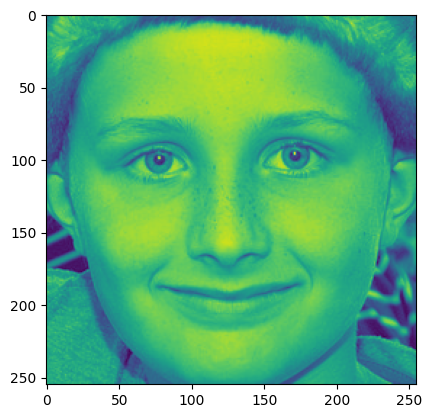

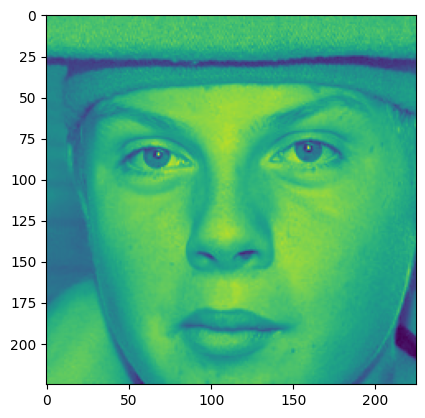

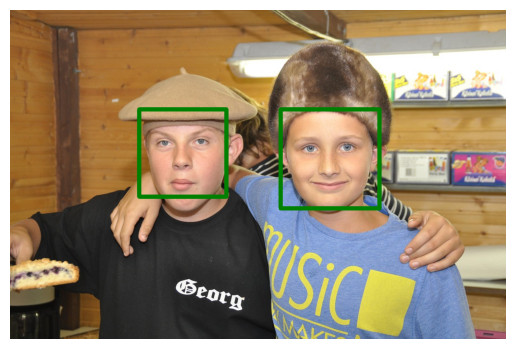

In [15]:
# penCV (cv2) reads images in BGR color order (Blue, Green, Red).
# Matplotlib (plt.imshow) expects images in RGB order (Red, Green, Blue).
src = cv2.imread(r'C:\Users\hp\Downloads/frt.jpg')
print(src.shape)
face = detect_face(src)
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

**Resizing images using OpenCV**

(48, 48, 3)


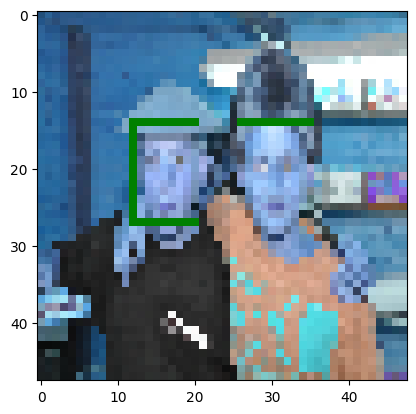

In [81]:
image_48_48= cv2.resize(face, (48,48), cv2.INTER_CUBIC)
print(image_48_48.shape)
plt.imshow(image_48_48)